In [55]:
pdb_dir = "../datasets/casp16/R1203_newMXfold2_pdb/R1203_AF3_newMXfold2_FARFAR2/top100"

from Bio import PDB
import numpy as np
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser, Superimposer
from sklearn.manifold import MDS
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# PDBファイルのリスト
pdb_files = [f for f in os.listdir(pdb_dir) if f.endswith('.pdb')]
# sort 
pdb_files.sort()

# RMSD計算用関数
def calculate_rmsd(file1, file2):
    parser = PDBParser()
    structure1 = parser.get_structure('X', os.path.join(pdb_dir, file1))
    structure2 = parser.get_structure('Y', os.path.join(pdb_dir, file2))
    
    atoms1 = [atom for atom in structure1.get_atoms()]
    atoms2 = [atom for atom in structure2.get_atoms()]
    
    sup = Superimposer()
    sup.set_atoms(atoms1, atoms2)
    sup.apply(atoms2)
    
    return sup.rms


def extract_scores(filename):
    import re
    
    scores = {}
    with open(filename, 'r') as file:
        for line in file:
            if "SCORE:" in line:
                # スコアの部分を抽出して数値のリストに変換
                # score_values = re.findall(r"[-+]?\d*\.\d+|\d+", line)
                line = line.strip().split("\t")
                # print(line)
                if line[1] != "score":
                    scores[line[-1]] = float(line[1])
                    # scores.append(float(line[1]))
    return scores

scores_farfar = extract_scores(os.path.join(pdb_dir, "scores/score_sorted.txt"))
label = "FARFAR potential"

# df_scores = pd.read_csv(os.path.join(pdb_dir, "scores/energies_summary.csv"))
# scores = df_scores["RNA_BRiQ"]
# label = "RNA_BRiQ potential"

In [23]:
n = 100
rmsd_matrix = np.zeros((n, n))

for i in range(n):
    print(i)
    for j in range(i + 1, n):
        rmsd = calculate_rmsd(pdb_files[i], pdb_files[j])
        rmsd_matrix[i, j] = rmsd
        rmsd_matrix[j, i] = rmsd


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


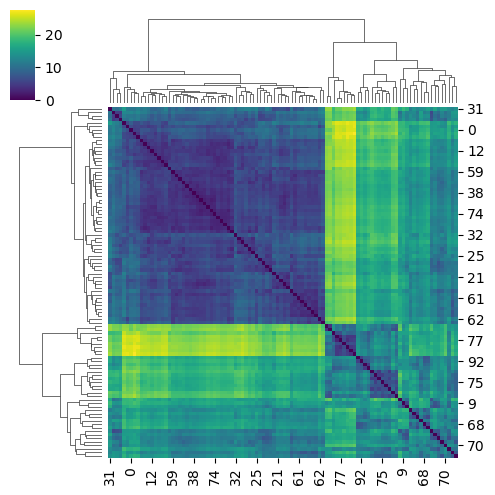

In [24]:
import seaborn as sns

# sns.clustermap(1/(rmsd_matrix+1), cmap='viridis')
sns.clustermap(rmsd_matrix, cmap='viridis', figsize=(5,5))

In [71]:
df_scores = pd.read_csv(os.path.join(pdb_dir, "scores/energies_summary.csv"))
scores_briq = {pdb_files[i].replace(".pdb", ""): df_scores["RNA_BRiQ_x"][i] for i in range(n)}
scores_briq["S_000416"]

-374.181

In [37]:
# MDSを使用して2Dにプロジェクト
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
coords = mds.fit_transform(rmsd_matrix)

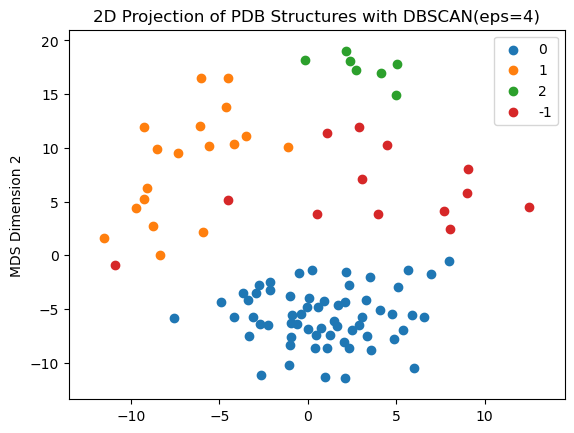

In [51]:
from sklearn.cluster import DBSCAN
eps = 4
clustering = DBSCAN(eps=eps, min_samples=6).fit(coords)

plt.figure()
for c in set(clustering.labels_):
    plt.scatter(coords[clustering.labels_ == c, 0], coords[clustering.labels_ == c, 1], label=c)
plt.legend()
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)

# plt.colorbar(label=label)
# plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with DBSCAN(eps={eps})')
plt.show()


In [66]:
scores_farfar["S_000416"]

-204.825

In [88]:
def get_cluster_members(clustering, cluster_id):
    return [pdb_files[i].replace(".pdb", "") for i in range(len(pdb_files)) if clustering.labels_[i] == cluster_id]

def get_cluster_energy(clustering, scores, cluster_id):
    members = get_cluster_members(clustering, cluster_id)
    tmp = {m:scores[m] for m in members} 
    # sort_values
    return dict(sorted(tmp.items(), key=lambda x:x[1]))
 
c = 0
e_farfar = get_cluster_energy(clustering, scores_farfar, c) # 1st: S_000416
e_briq = get_cluster_energy(clustering, scores_briq, c) # 1st: S_000197

e_briq

{'S_000197': -392.118,
 'S_000925': -376.049,
 'S_000525': -374.726,
 'S_000368': -374.502,
 'S_000416': -374.181,
 'S_000082': -372.364,
 'S_000971': -366.213,
 'S_000455': -364.615,
 'S_000501': -364.523,
 'S_000301': -360.182,
 'S_000092': -359.637,
 'S_000266': -359.567,
 'S_000366': -358.764,
 'S_000606': -358.166,
 'S_000375': -358.124,
 'S_000165': -358.019,
 'S_000169': -357.713,
 'S_000834': -356.057,
 'S_000838': -356.015,
 'S_000822': -355.584,
 'S_000411': -354.862,
 'S_000655': -354.576,
 'S_000013': -354.368,
 'S_000265': -353.929,
 'S_000901': -353.757,
 'S_000217': -353.549,
 'S_000041': -351.607,
 'S_000825': -348.618,
 'S_000714': -346.723,
 'S_000756': -346.57,
 'S_000181': -346.564,
 'S_000450': -345.814,
 'S_000853': -342.233,
 'S_000009': -341.976,
 'S_000371': -341.282,
 'S_000124': -338.939,
 'S_000612': -338.909,
 'S_000001': -338.118,
 'S_000404': -337.354,
 'S_000080': -337.036,
 'S_000109': -336.435,
 'S_000475': -336.071,
 'S_000953': -333.248,
 'S_000639':

In [90]:
get_cluster_members(clustering, 1)

['S_000016',
 'S_000024',
 'S_000074',
 'S_000216',
 'S_000247',
 'S_000327',
 'S_000344',
 'S_000446',
 'S_000490',
 'S_000496',
 'S_000610',
 'S_000618',
 'S_000680',
 'S_000782',
 'S_000811',
 'S_000812',
 'S_000827',
 'S_000995']

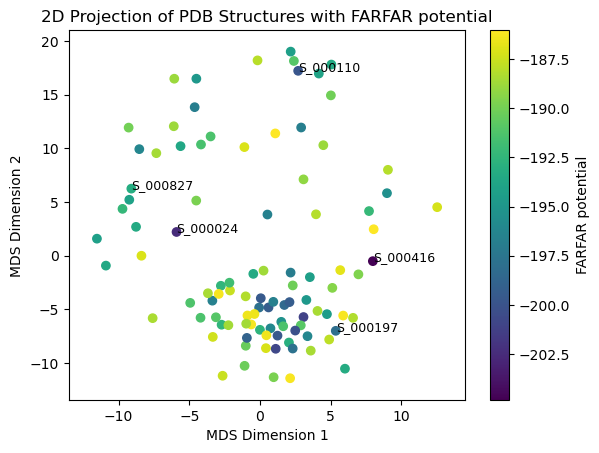

In [84]:
plt.figure()
plt.scatter(coords[:, 0], coords[:, 1], c=[scores_farfar[k.replace(".pdb", "")] for k in pdb_files], cmap='viridis')
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)


# plot S_000416 S_000197 S_000024 S_000827 S_000110
for i in range(n):
#     plt.text(coords[i, 0]-2, coords[i, 1]+0.5, os.path.splitext(pdb_files[i])[0], fontsize=9)
    if os.path.splitext(pdb_files[i])[0] in ["S_000416", "S_000197", "S_000024", "S_000827", "S_000110"]:
        plt.text(coords[i, 0], coords[i, 1], os.path.splitext(pdb_files[i])[0], fontsize=9)


label = "FARFAR potential"
plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with FARFAR potential')
plt.show()


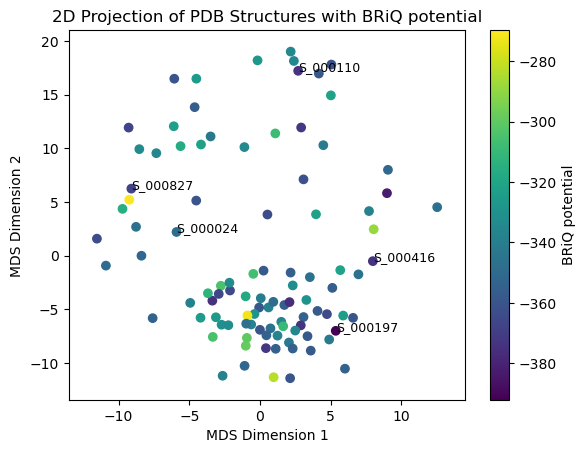

In [86]:
df_scores = pd.read_csv(os.path.join(pdb_dir, "scores/energies_summary.csv"))
scores = df_scores[df_scores["pdb"].isin(pdb_files)]["RNA_BRiQ_x"]


plt.figure()
plt.scatter(coords[:, 0], coords[:, 1], c=[scores_briq[k.replace(".pdb", "")] for k in pdb_files], cmap='viridis')
plt.xlim(min(coords[:, 0])-2, max(coords[:, 0])+2)
plt.ylim(min(coords[:, 1])-2, max(coords[:, 1])+2)


# plot S_000416 S_000197 S_000024 S_000827 S_000110
for i in range(n):
#     plt.text(coords[i, 0]-2, coords[i, 1]+0.5, os.path.splitext(pdb_files[i])[0], fontsize=9)
    if os.path.splitext(pdb_files[i])[0] in ["S_000416", "S_000197", "S_000024", "S_000827", "S_000110"]:
        plt.text(coords[i, 0], coords[i, 1], os.path.splitext(pdb_files[i])[0], fontsize=9)


label = "BRiQ potential"
plt.colorbar(label=label)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title(f'2D Projection of PDB Structures with BRiQ potential')
plt.show()


In [34]:
df_scores = pd.read_csv(os.path.join(pdb_dir, "scores/energies_summary.csv"))
df_scores[df_scores["pdb"].isin(pdb_files)]

,pdb,RNA_BRiQ_x,RNA_BRiQ_y
0,S_000001.pdb,-338.118,-338.118
1,S_000009.pdb,-341.976,-341.976
2,S_000010.pdb,-346.475,-346.475
3,S_000013.pdb,-354.368,-354.368
4,S_000016.pdb,-334.184,-334.184
...,...,...,...
95,S_000953.pdb,-333.248,-333.248
96,S_000962.pdb,-349.664,-349.664
97,S_000971.pdb,-366.213,-366.213
98,S_000995.pdb,-314.660,-314.660
